### 1. State the Hypotheses

- Null Hypothesis (
𝐻
0
​
 ): There is no association between the type of device and customer satisfaction level.
- Alternative Hypothesis (
𝐻
1
​
 ): There is a significant association between the type of device and customer satisfaction level

### 2. Compute the Chi-Square Statistic

The Formula used:
                $$
\chi^2 = \sum \frac{(O - E)^2}{E}
$$

Where:  
- \( O \) = Observed outcome
- \( E \) = Expected outcome

### 3. Determine the Critical Value

In [2]:
# data provided

import pandas as pd

# Creating the DataFrame
provideddata = {
    "Satisfaction Level": ["Very Satisfied", "Satisfied", "Neutral", "Unsatisfied", "Very Unsatisfied"],
    "Smart Thermostat": [50, 80, 60, 30, 20],
    "Smart Light": [70, 100, 90, 50, 50],
    "Total": [120, 180, 150, 80, 70]
}

df = pd.DataFrame(provideddata)

# Display the DataFrame
print(df)

  Satisfaction Level  Smart Thermostat  Smart Light  Total
0     Very Satisfied                50           70    120
1          Satisfied                80          100    180
2            Neutral                60           90    150
3        Unsatisfied                30           50     80
4   Very Unsatisfied                20           50     70


In [3]:
df.shape

(5, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Satisfaction Level  5 non-null      object
 1   Smart Thermostat    5 non-null      int64 
 2   Smart Light         5 non-null      int64 
 3   Total               5 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 292.0+ bytes


In [5]:
df.describe()

,Smart Thermostat,Smart Light,Total
count,5.000000,5.000000,5.000000
mean,48.000000,72.000000,120.000000
std,23.874673,22.803509,46.368092
min,20.000000,50.000000,70.000000
25%,30.000000,50.000000,80.000000
50%,50.000000,70.000000,120.000000
75%,60.000000,90.000000,150.000000
max,80.000000,100.000000,180.000000


In [6]:
df.isnull().sum()

Satisfaction Level    0
Smart Thermostat      0
Smart Light           0
Total                 0
dtype: int64

In [7]:
#The correlation matrix
z = df.corr(numeric_only=True)
print(z)

                  Smart Thermostat  Smart Light     Total
Smart Thermostat          1.000000     0.973502  0.993656
Smart Light               0.973502     1.000000  0.993044
Total                     0.993656     0.993044  1.000000


<Axes: >

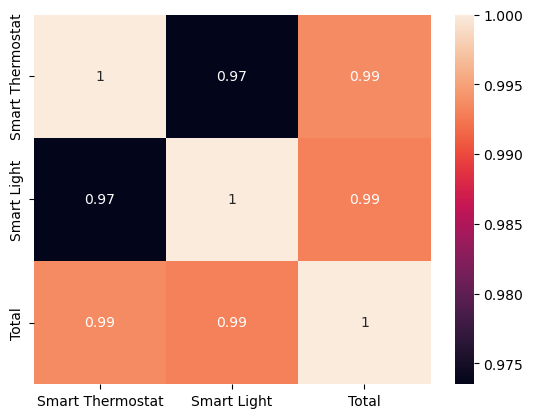

In [8]:
#Heatmap

import seaborn as sns

sns.heatmap(z, annot=True)

In [9]:
df.columns

Index(['Satisfaction Level', 'Smart Thermostat', 'Smart Light', 'Total'], dtype='object')

In [13]:
# Creating a Cross Table

cross_table = pd.crosstab(df['Smart Thermostat'], df['Smart Light'])
print(cross_table)

Smart Light       50   70   90   100
Smart Thermostat                    
20                  1    0    0    0
30                  1    0    0    0
50                  0    1    0    0
60                  0    0    1    0
80                  0    0    0    1


In [14]:
# Finding Observed outcome:

obs_value = cross_table.values
print(obs_value)

[[1 0 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


In [15]:
# chi-square contigency table

import scipy.stats as stats 
from scipy.stats import chi2_contingency

In [16]:
val = stats.chi2_contingency(cross_table)
print(val)

Chi2ContingencyResult(statistic=15.000000000000002, pvalue=0.24143645097027544, dof=12, expected_freq=array([[0.4, 0.2, 0.2, 0.2],
       [0.4, 0.2, 0.2, 0.2],
       [0.4, 0.2, 0.2, 0.2],
       [0.4, 0.2, 0.2, 0.2],
       [0.4, 0.2, 0.2, 0.2]]))


In [17]:
# Finding Expected outcome:

expt_value = val[3]
print(expt_value)

[[0.4 0.2 0.2 0.2]
 [0.4 0.2 0.2 0.2]
 [0.4 0.2 0.2 0.2]
 [0.4 0.2 0.2 0.2]
 [0.4 0.2 0.2 0.2]]


In [23]:
# Degrees Of Freedom

no_of_rows = len(cross_table.iloc[:,0])
no_of_cols = len(cross_table.iloc[0,:])
print(no_of_rows)
print(no_of_cols)

5
4


In [24]:
ddof = (no_of_rows - 1) * (no_of_cols - 1)
print("Degrees Of Freedom : ",ddof)

Degrees Of Freedom :  12


In [27]:
# calculate the chi value

from scipy.stats import chi2

chi_square = sum([(o-e) ** 2./e for o,e in zip(obs_value, expt_value)])

In [28]:
print("Chi-Square : ", chi_square)

Chi-Square :  [3. 4. 4. 4.]


In [31]:
chi_square_statistic = chi_square[0]+chi_square[1]+chi_square[2]+chi_square[3]
print("Chi-Square Statistic : ",chi_square_statistic)

Chi-Square Statistic :  15.0


In [33]:
# FINDING Critical Value:
alpha = 0.05
critical_value = chi2.ppf(q = 1 - alpha, df = ddof)
print("Critical Value : ",critical_value)

Critical Value :  21.02606981748307


### 4. Make a Decision

In [34]:
if chi_square_statistic >= critical_value:
    decision = "Reject the null hypothesis: There is no association between the type of device and customer satisfaction level."
else:
    decision = "Fail to reject the null hypothesis: There is a significant association between the type of device and customer satisfaction level"
    
print(decision)

Fail to reject the null hypothesis: There is a significant association between the type of device and customer satisfaction level


In [35]:
# Also finding the P-value:
p_value = chi2.cdf(x=chi_square_statistic, df = ddof)
print("P-Value", p_value)

P-Value 0.7585635490297246


### 5. Conclusion

In [42]:
print("Chi-Square Test Results:")
print("-----------------------------")
print(f"Chi-Square Statistic: {chi_square_statistic:.4f}")
print(f"Degrees of Freedom: {ddof}")
print(f"Critical Value: {critical_value:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Decision: {decision}")

Chi-Square Test Results:
-----------------------------
Chi-Square Statistic: 15.0000
Degrees of Freedom: 12
Critical Value: 21.0261
P-Value: 0.7586
Decision: Fail to reject the null hypothesis: There is a significant association between the type of device and customer satisfaction level
